# Analyze fundamental frequency (FF) of a song syllable

- Take parameters (onset & offset of FF, etc) from ff table
- Read results values from ff_result table
- Some examples of syllables with detected FF

<img src="img/ff_example.png" width=800 height=800 />

## Load data from ff_result table

In [7]:
from database.load import ProjectLoader
from util import save
from deafening.plot import plot_across_days_per_note
from analysis.functions import add_pre_normalized_col

save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'Results')  # folder where result figures will be saved

# Load database
df = ProjectLoader().load_db().to_dataframe(f"SELECT * FROM ff_result")
df_norm = add_pre_normalized_col(df, 'ffUndirCV', 'ffUndirCVNorm')  # add a column for normalized ff (normalization by the pre-deafening mean)
df_norm = add_pre_normalized_col(df_norm, 'ffDirCV', 'ffDirCVNorm')  
df_norm.set_index('id')

,songID,birdID,taskName,taskSession,taskSessionDeafening,taskSessionPostDeafening,block10days,note,nbNoteUndir,nbNoteDir,ffMeanUndir,ffMeanDir,ffUndirCV,ffDirCV,ffUndirCVNorm,ffDirCVNorm
id,,,,,,,,,,,,,,,,
1,2,b70r38,Predeafening,19,-2,0,0,a,29.0,NaN,994.726,NaN,1.449,NaN,NaN,NaN
2,2,b70r38,Predeafening,19,-2,0,0,b,28.0,NaN,631.421,NaN,1.086,NaN,NaN,NaN
3,2,b70r38,Predeafening,19,-2,0,0,d,25.0,NaN,1374.336,NaN,1.754,NaN,NaN,NaN
4,3,b70r38,Predeafening,20,-1,0,0,a,37.0,29.0,991.416,1009.929,1.860,1.227,NaN,NaN
5,3,b70r38,Predeafening,20,-1,0,0,b,34.0,26.0,629.735,637.928,1.240,0.688,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,96,y44r34,Postdeafening,22,22,22,3,d,36.0,NaN,2307.051,NaN,1.306,NaN,0.936067,NaN
149,97,y44r34,Postdeafening,24,24,24,3,d,23.0,NaN,2314.164,NaN,1.081,NaN,0.774799,NaN
150,98,y44r34,Postdeafening,27,27,27,3,d,73.0,NaN,2290.976,NaN,1.577,NaN,1.130304,NaN


## Plot CV of FF across days per syllable

- Undir songs only. (Not enough Dir songs)
- Plot the value only if the number of notes >= 10

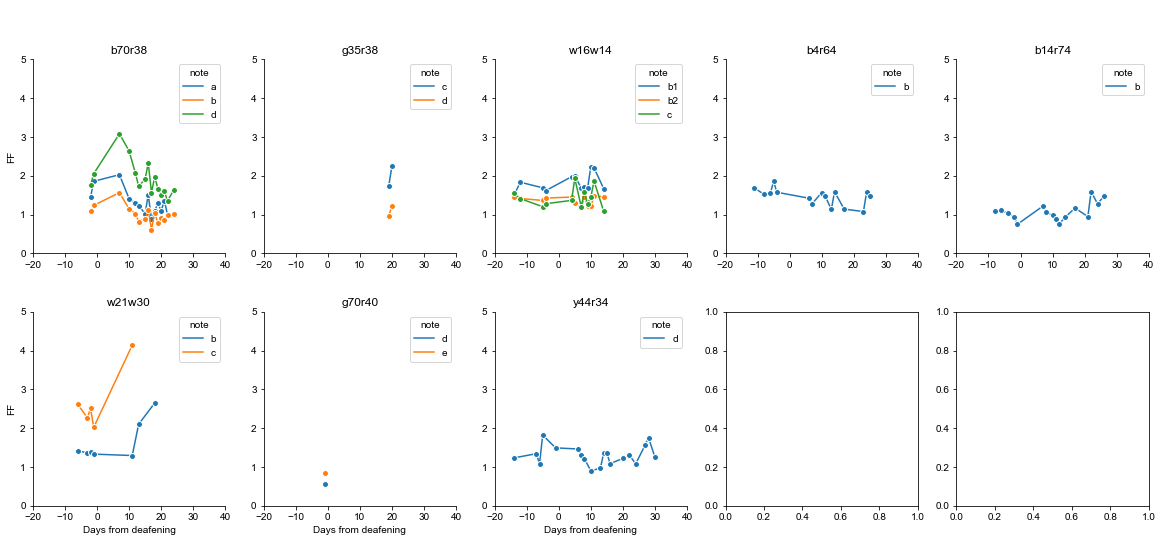

In [9]:
plot_across_days_per_note(df_norm, x='taskSessionDeafening', y='ffUndirCV',
                 x_label='Days from deafening',
                 y_label='FF',
                 title='CV of FF (Undir)', fig_name='FF_across_days',
                 x_lim=[-20, 40], y_lim=[0, 5],
                 save_path=save_path,
                 save_fig=False,
                 )

## Plot normalized CV of FF across days per syllable

- The same data as above (undir songs only).
- Values were normalized by the pre-deafening mean (=1, horizontal dash)

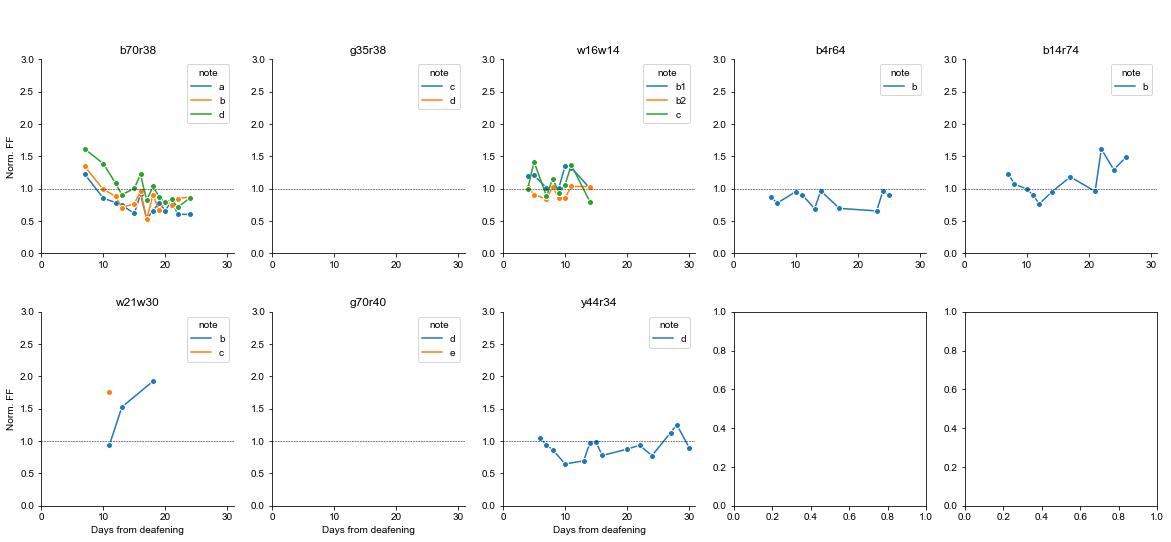

In [12]:
plot_across_days_per_note(df_norm, x='taskSessionDeafening', y='ffUndirCVNorm',
                 x_label='Days from deafening',
                 y_label='Norm. FF',
                 title='CV of FF (Undir)', fig_name='FF_across_days',
                 x_lim=[0, 31],
                 y_lim=[0, 3],
                 hline=1,
                 view_folder=True,
                 save_fig=False,
                 )

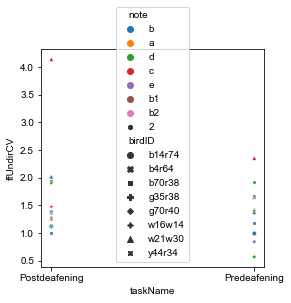

In [13]:
# Compare conditional means of CV of FF
import matplotlib.pyplot as plt
import seaborn as sns

df_cv_undir = df_norm.groupby(['birdID', 'note', 'taskName']).mean()['ffUndirCV'].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
# df_cv_undir.groupby(['taskName']).mean()
ax = sns.scatterplot(x='taskName', y='ffUndirCV', data=df_cv_undir, hue="note", style="birdID", size=2)
